# 머신러닝 모델 비교

- 선형모델, SVM, 로지스틱회귀, 결정트리, 랜덤포레스트, kNN, 나이브 베이즈, 부스팅

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.13.52.png?raw=1" align='left'  width=400>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.15.40.png?raw=1" align='left'  width=500>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'

In [96]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import MultinomialNB 
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_breast_cancer

## 데이터

- 유방암 데이터

In [16]:
cancer = load_breast_cancer() 
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = cancer.target
print(X.shape)
X[:3]

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [18]:
# 스케일링
scaler = MinMaxScaler() # 모든 값이 양수로만 표현되어야 할 때
X.loc[:,:] = scaler.fit_transform(X)
X[:3]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433


In [79]:
def train_classifier(model, X, y, test_s=0.25): 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=9, test_size=test_s)
    model.fit(X_train, y_train)
    print(model, model.score(X_test, y_test).round(4))

In [81]:
lic = SGDClassifier()
lrc = LogisticRegression() # (solver='liblinear', penalty='l1')
svc = SVC(kernel='linear')
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=50)
knc = KNeighborsClassifier(n_neighbors=5)
mnb = MultinomialNB() # (alpha=0.2)

In [82]:
models = [lic, lrc, svc, dtc, rfc, knc, mnb]

In [87]:
for model in models:
    train_classifier(model, X, y, 0.3)

SGDClassifier() 0.9591
LogisticRegression() 0.9766
SVC(kernel='linear') 0.9766
DecisionTreeClassifier() 0.9415
RandomForestClassifier(n_estimators=50) 0.9591
KNeighborsClassifier() 0.9708
MultinomialNB() 0.8421


In [134]:
lgbm = LGBMClassifier(n_estimators=200)
X_train, X_test, y_train, y_test = train_test_split(X, y)
lgbm.fit(X_train, y_train, early_stopping_rounds=5, eval_set=(X_test, y_test), verbose=False)
lgbm.score(X_test, y_test).round(4)

0.9371

In [66]:
def plot_features_weights(features, weights):
    W = pd.DataFrame({'Weights':weights}, features)
    W.sort_values(by='Weights', ascending=True).plot(kind='barh', 
                        color='b', figsize=(8,6))
    plt.gca().legend_ = None

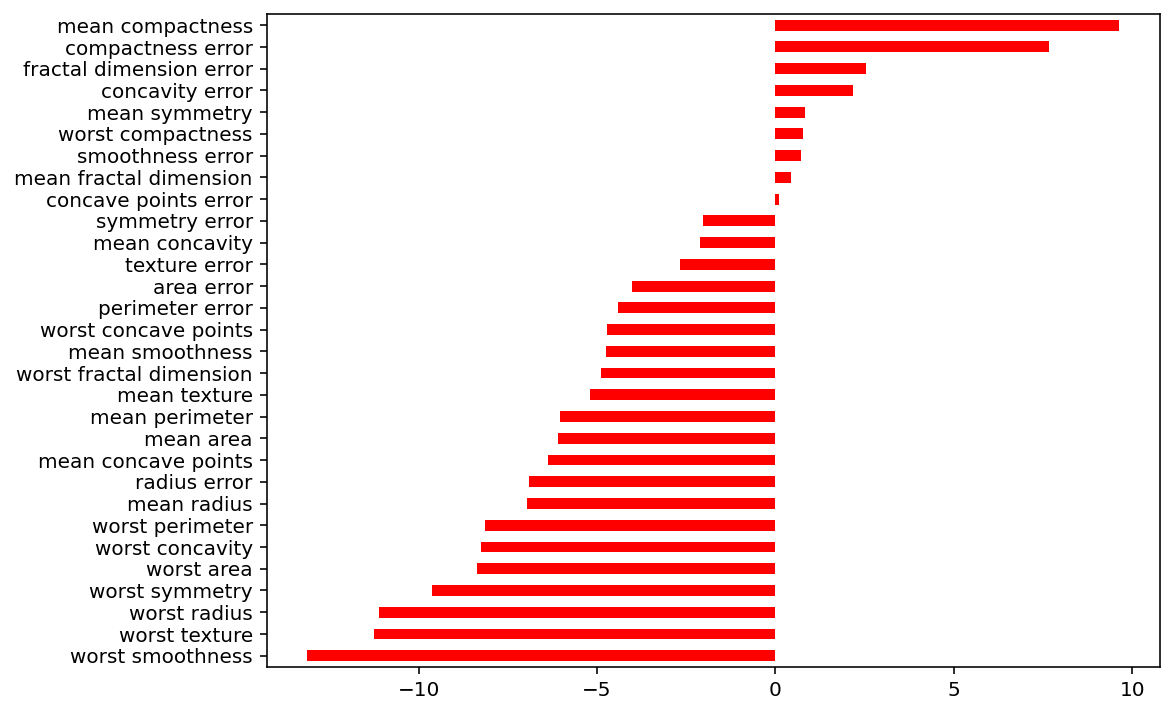

In [72]:
plot_features_weights(X.columns,lic.coef_.ravel())

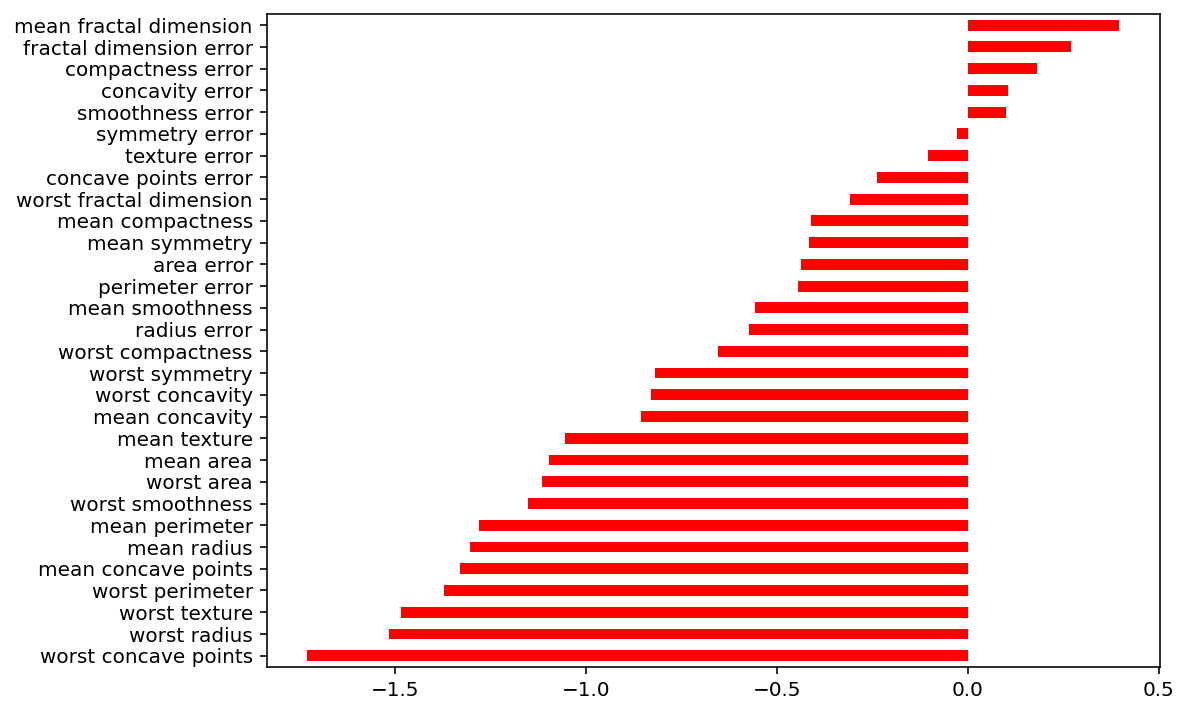

In [71]:
plot_features_weights(X.columns,lrc.coef_.ravel())

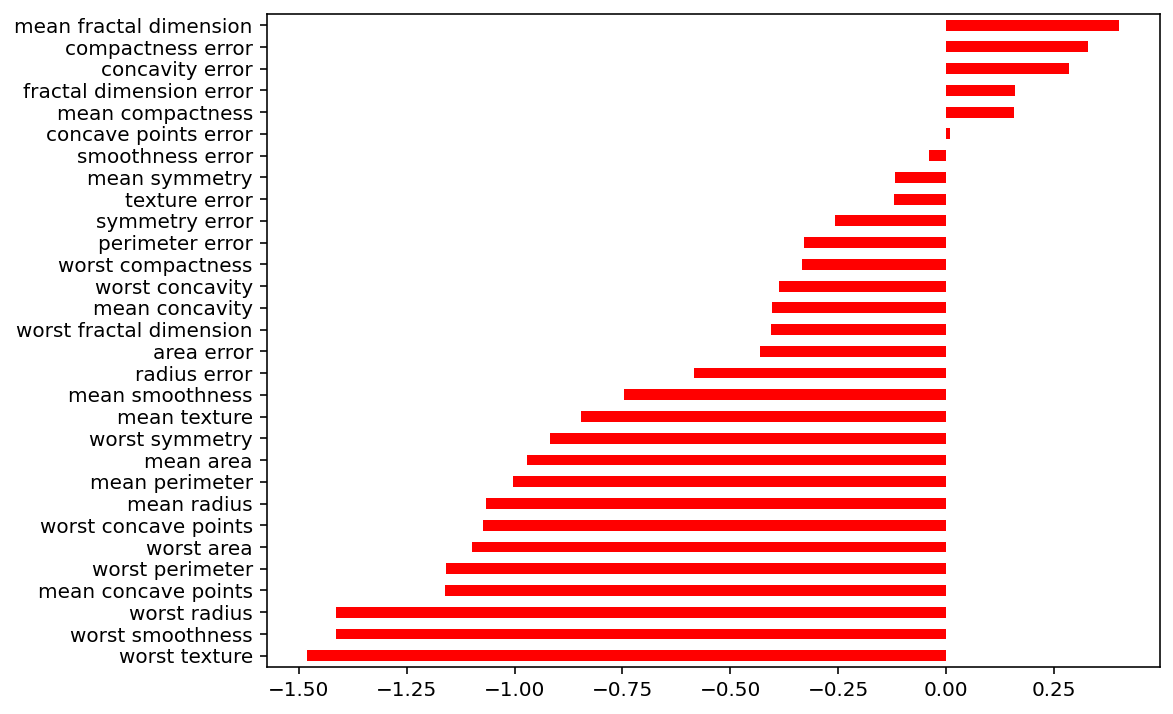

In [68]:
plot_features_weights(X.columns,svc.coef_.ravel())

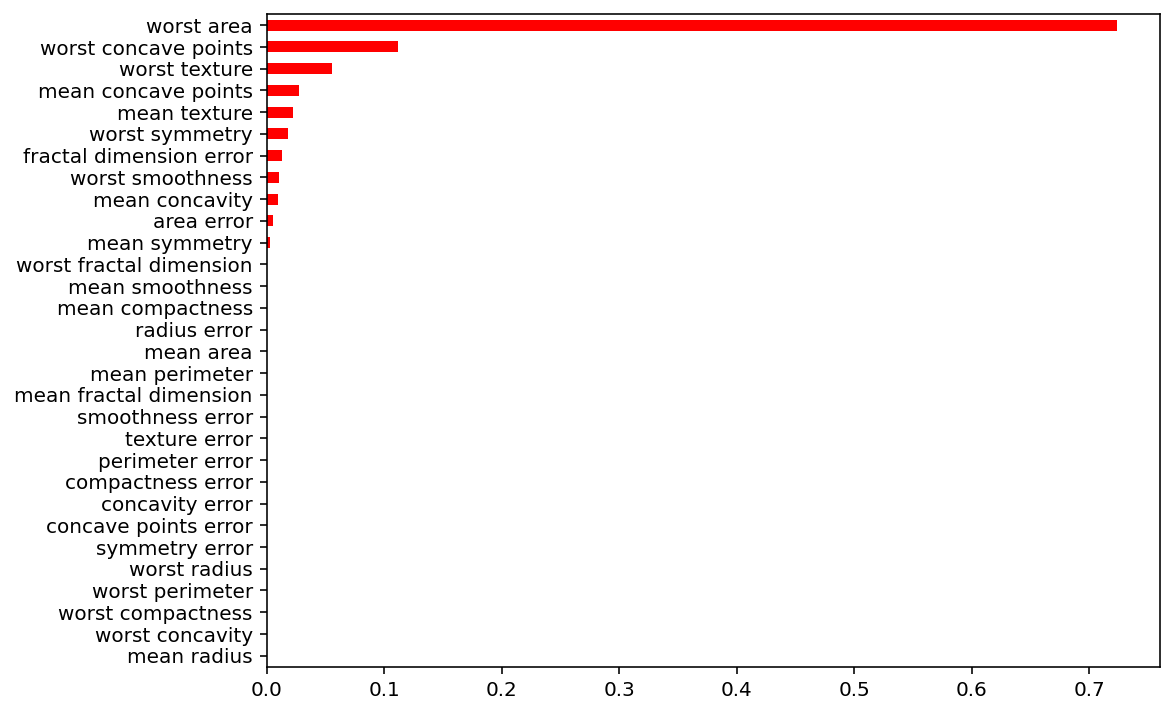

In [136]:
plot_features_weights(X.columns,dtc.feature_importances_)

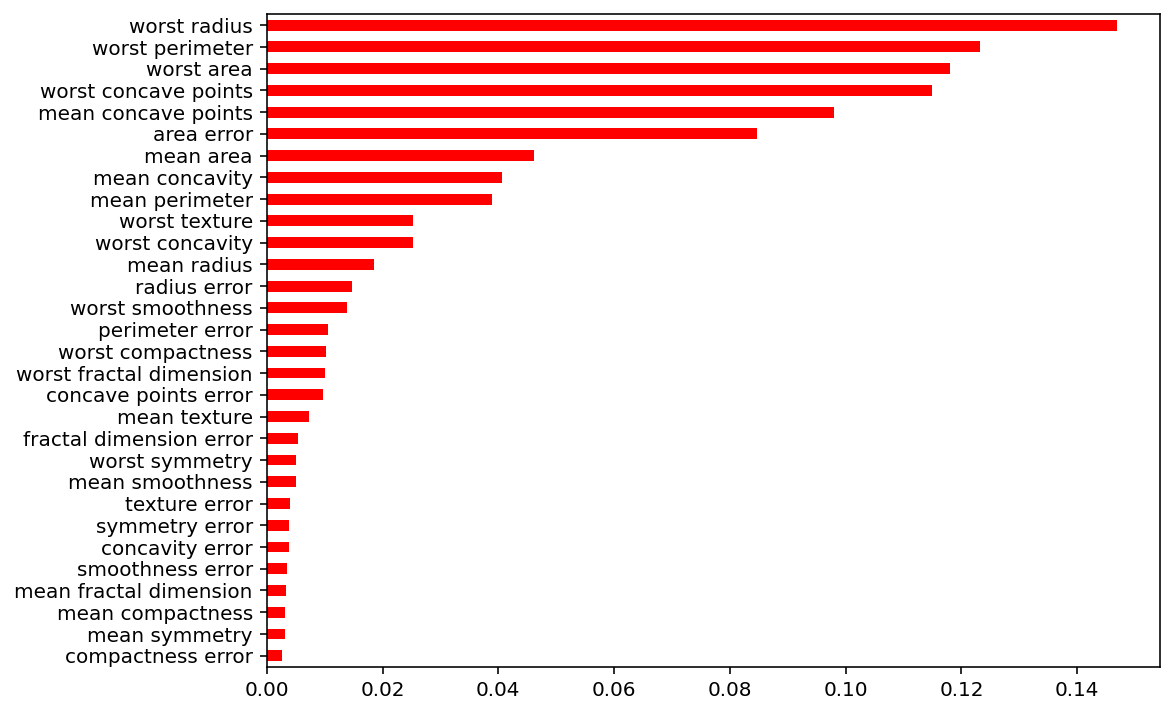

In [137]:
plot_features_weights(X.columns,rfc.feature_importances_)

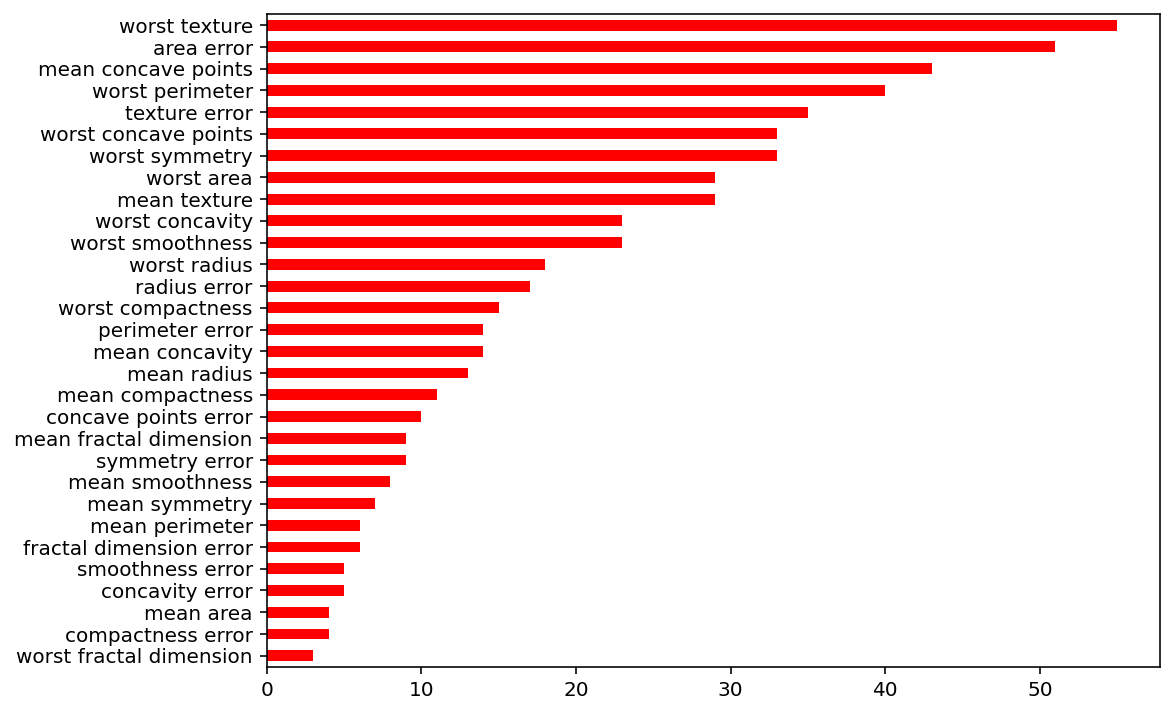

In [138]:
plot_features_weights(X.columns,lgbm.feature_importances_)

## 교차 검증

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.27.57.png?raw=1" align='left'  width=400>

In [ ]:
def cross_validation(model, X, y, cv=5): 
    print(model, cross_val_score(model, X, y, cv=cv).mean().round(4))
for model in models:
    cross_validation(model, X, y, 10)

## 랜덤 포레스트
- 결정 트리의 성능을 개선한 방법
- 간단한 구조의 결정 트리(weak learner)를 수십~수백개를 만들고 각 결정 트리의 동작 결과의 평균치를 구하는 방법
- 앙상블(ensemble) 방법이 하나의 모델만 만드는 것보다 좋은 성능을 보인다
- 각 결정 트리를 만들 때 훈련 데이터의 일부만 사용하거나 특성의 일부를 무작위로 선택하여 만든다 
- 앙상블의 갯수: n_estimators

- 랜덤 포레스트 개념

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.13.52.png?raw=1" align='left'  width=400>

### 소프트 투표

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.52.18.png?raw=1" align='left'  width=400>

## 나이브 베이즈

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.29.38.png?raw=1" align='left'  width=250>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.29.56.png?raw=1" align='left'  width=200>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.30.57.png?raw=1" align='left'  width=550>

## kNN

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.28.52.png?raw=1" align='left'  width=300>

# 하이퍼파라미터 최적화
- 과대적합이나 과소적합을 줄여 최대의 성능을 내는 환경 변수(하이퍼 파라미터)를 찾는 것

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.18.00.png?raw=1" align='left'  width=300>

<img src="https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-05-30%20%E1%84%8B%E1%85%A9%E1%84%8C%E1%85%A5%E1%86%AB%209.18.09.png?raw=1" align='left'  width=300>

##  그리드 탐색

<img src="
https://github.com/StillWork/image/blob/main/%E1%84%89%E1%85%B3%E1%84%8F%E1%85%B3%E1%84%85%E1%85%B5%E1%86%AB%E1%84%89%E1%85%A3%E1%86%BA%202021-03-14%20%E1%84%8B%E1%85%A9%E1%84%92%E1%85%AE%204.21.02.png?raw=1" align='left' width=350>

## GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y)

#그리드 서치의 매개변수를 설정한다(C, gamma)
params = [{"C": [1,10,100,1000], "kernel":["linear"]},
    {"C": [1,10,100,1000], "kernel":["rbf"], "gamma":[0.001, 0.0001]}]

clf = GridSearchCV(SVC(), params, n_jobs=-1 )
clf.fit(X_train, y_train)
print('최적값 :', clf.best_estimator_)
print('최적 score :', clf.best_score_)

#테스트 데이터로 최종 평가
score = clf.score(X_test, y_test)
print('최종 평가 =',score)

최적값 : SVC(C=1, kernel='linear')
최적 score : 0.9765253077975377
최종 평가 = 0.972027972027972


# 앙상블, 부스팅

## 배깅 앙상블
- "같은" 모델을 사용하고 데이터를 무작위로 달리 사용한다
- 배깅: 중복허용 (bootstrap aggregation)
- 병렬로 처리할 수 있다
- (예)랜덤 포레스트: 배깅을 적용한 결정트리 앙상블 기법

## 부스팅 알고리즘
- 앞의 약한 모델을 보완해 나가는 앙상블 모델

### 에이다부스트 (adaptive boosting)
- 이전 모델에서 과소적합했던 훈련 샘플의 가중치를 더 높여주는 것 (학습하기 어려운 샘플에 점점 더 맞춰진다)
- 잘 못 분류된 훈련 샘플의 가중치를 높인다, 두번째 분류기는 업데이트된 가중치를 사용하여 "예측기"를 만들어본다 (단계별로 채점을 해보는 것임)
- 경사하강법이 "손실함수"를 점차 줄이듯이, 에이다 부스트는 예측기를 만들어 "성능"이 좋아지도록 학습한다.
- 모든 예측기를 만든 이후에 배깅이나 페이스팅을 적용한다. 단 가중치가 적용된 정확도에 따라 예측기마다 다른 가중치를 적용한다
- 병렬처리는 안된다

<img src= "https://bit.ly/2zjphkA" width="500">

### XGBoost
### LightGBM